In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,GRU
from sklearn.metrics import mean_squared_error


In [16]:
df = pd.read_csv('cloudy_cluster.csv')
df.head()

,Clearsky DHI,GHI,cluster,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,0,0,0,5.0,0,63.52,1.4,0,0,0,0,174.62
1,0,0,0,4.7,0,65.31,1.4,0,0,0,0,161.76
2,0,0,0,6.2,0,75.81,1.3,0,0,0,0,148.34
3,0,0,0,5.6,0,79.06,1.3,0,0,0,0,134.93
4,0,0,0,5.0,0,82.37,1.4,0,0,0,0,121.67


In [17]:
df.dropna(inplace=True)

In [18]:
df.drop(["cluster"],axis=1,inplace=True)

In [19]:
df.head()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,0,0,5.0,0,63.52,1.4,0,0,0,0,174.62
1,0,0,4.7,0,65.31,1.4,0,0,0,0,161.76
2,0,0,6.2,0,75.81,1.3,0,0,0,0,148.34
3,0,0,5.6,0,79.06,1.3,0,0,0,0,134.93
4,0,0,5.0,0,82.37,1.4,0,0,0,0,121.67


In [20]:
df.describe()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
count,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000
mean,22.804008,42.034137,18.194124,82.918648,40.696788,2.417833,71.039402,0.744565,48.393682,21.630605,113.522045
std,49.770999,92.543872,8.220768,180.425605,19.206628,1.116259,164.585380,2.040437,109.771611,46.143014,29.116220
min,0.000000,0.000000,-0.800000,0.000000,6.100000,0.200000,0.000000,0.000000,0.000000,0.000000,19.630000
25%,0.000000,0.000000,11.075000,0.000000,26.630000,1.600000,0.000000,0.000000,0.000000,0.000000,88.857500
50%,0.000000,0.000000,18.700000,0.000000,36.660000,2.200000,0.000000,0.000000,0.000000,0.000000,114.565000
75%,1.250000,1.250000,24.800000,0.000000,51.410000,3.100000,0.000000,0.000000,1.250000,1.250000,134.842500
max,480.000000,390.000000,39.400000,912.000000,100.000000,7.800000,802.000000,8.000000,901.000000,313.000000,174.720000


In [21]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [22]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['GHI']])

In [23]:
Xs.shape

(5888, 11)

In [24]:
#Xs.reshape(1,662,6)

In [25]:
Ys.shape

(5888, 1)

In [26]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [27]:
X,Y = np.array(X), np.array(Y)

In [28]:
X_train1, y_train1 = X[:4711], Y[:4711]
X_test1, y_test1 = X[4711:], Y[4711:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((4711, 5, 11), (4711, 1), (1172, 5, 11), (1172, 1))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
#model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],X.shape[2])))  
#model.add(Dropout (0.2))
#model.add(LSTM(units=50,return_sequences=True))

#model.add(Dropout (0.2))
#model.add(LSTM(units=50))
#model.add(Dropout (0.2))
#model.add(Dense(units=1))
#model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

# Adding the first LSTM layer and some Dropout regularisation
model.add(GRU(units = 64, activation='relu', return_sequences=True,input_shape=(X_train1.shape[1], X_train1.shape[2])))
model.add(Dropout(0.1))
model.add(GRU(units = 128, activation='relu',return_sequences=True ))
model.add(Dropout(0.1))
model.add(LSTM(units = 32, activation='relu',return_sequences=True ))
model.add(Dropout(0.1))
model.add(GRU(units = 32, activation='relu'))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 10))    
model.add(Dense(units = 1))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [30]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=20)
end= time.time()
continental= end-start

Epoch 1/20
148/148 [==============================] - 11s 19ms/step - loss: 0.1416 - root_mean_squared_error: 0.3763
Epoch 2/20
148/148 [==============================] - 3s 22ms/step - loss: 0.0480 - root_mean_squared_error: 0.2192
Epoch 3/20
148/148 [==============================] - 3s 22ms/step - loss: 0.0365 - root_mean_squared_error: 0.1911
Epoch 4/20
148/148 [==============================] - 3s 19ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867
Epoch 5/20
148/148 [==============================] - 3s 19ms/step - loss: 0.0344 - root_mean_squared_error: 0.1854
Epoch 6/20
148/148 [==============================] - 3s 22ms/step - loss: 0.0331 - root_mean_squared_error: 0.1820
Epoch 7/20
148/148 [==============================] - 3s 20ms/step - loss: 0.0318 - root_mean_squared_error: 0.1784
Epoch 8/20
148/148 [==============================] - 3s 18ms/step - loss: 0.0324 - root_mean_squared_error: 0.1800
Epoch 9/20
148/148 [==============================] - 2s 17ms/step - lo

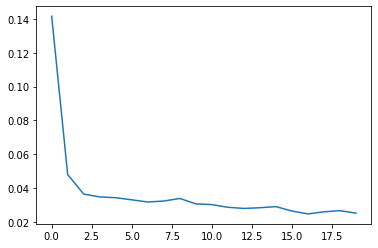

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [32]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
print("inference time:",continental)
print(Yp)

37/37 [==============================] - 1s 5ms/step
inference time: 1.0152091979980469
[[ 0.22418636]
 [-0.31023067]
 [-0.951477  ]
 ...
 [-1.0003479 ]
 [-0.9803962 ]
 [-0.9961131 ]]


In [33]:
Yp.shape

(1172, 1)

In [34]:
pred= s2.inverse_transform(Yp)

In [35]:
Actual= s2.inverse_transform(y_test1)

In [36]:
x= pred
z= Actual

In [37]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(z,x)
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)

Root Mean Square Error: 30.663576167375144
Mean Square Error: 940.2549033724168
Mean Absolute Error: 12.356523293378817


In [38]:
max= x.max()
min= x.min()
mean= x.mean()
max,min,mean

(290.01636, -1.8295848, 42.26094)

In [39]:
NRMSE= (RMSE/(max-min))*100
NRMSE

10.506767852927059

In [40]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [42]:
Calculated.to_csv(r"E:\CatBoost_1\Johannesburg\GRU\Cloudy hours\prediction.csv")

In [43]:
Actual.to_csv(r"E:\CatBoost_1\Johannesburg\GRU\Cloudy hours\Actual.csv")